# Problem Statement: To analysis the Covid 19 US daily report data and predict the mortality rate according to the different US states

In [17]:
import numpy as np
import pandas as pd
# For Visualization of data we would import
import matplotlib.pyplot as plt
import seaborn as sns
#For preprocessing like scaling,encoding we would import
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
#for model selection we import
import sklearn.model_selection 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
#For measuring the performance of the model we will import
from sklearn.metrics import mean_squared_error,mean_absolute_error
#Ensembleling
from sklearn.ensemble import RandomForestRegressor
#For saving the file we would import
import pickle


In [18]:
#Now that we have imported all the necessary files lets start with our EDA process

In [19]:
df=pd.read_csv('C:/Users/hp/Downloads/COVID_19_Datasets-master/COVID_19_Datasets-master/csse_covid_19_daily_reports_us.csv')
df.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


In [20]:
#OUr target variable is Mortality rate which is a numerical column so we would be using Linear Regression model

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        58 non-null     object 
 1   Country_Region        58 non-null     object 
 2   Last_Update           58 non-null     object 
 3   Lat                   56 non-null     float64
 4   Long_                 56 non-null     float64
 5   Confirmed             58 non-null     int64  
 6   Deaths                58 non-null     int64  
 7   Recovered             42 non-null     float64
 8   Active                58 non-null     float64
 9   FIPS                  58 non-null     int64  
 10  Incident_Rate         56 non-null     float64
 11  People_Tested         56 non-null     float64
 12  People_Hospitalized   33 non-null     float64
 13  Mortality_Rate        57 non-null     float64
 14  UID                   58 non-null     int64  
 15  ISO3                  58 

In [22]:
#There is four object type data we would be treating the same going a head

In [23]:
df.describe()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
count,56.000000,56.000000,58.000000,58.000000,42.000000,58.000000,58.000000,56.000000,5.600000e+01,33.000000,57.000000,5.800000e+01,56.000000,33.000000
mean,36.840089,-85.206614,26756.086207,1611.017241,7007.428571,20070.724138,3288.086207,396.230806,2.258534e+05,4897.454545,4.458248,7.676194e+07,3894.186870,14.342541
std,10.887035,49.754449,52562.031122,4084.750891,11674.490020,41294.705318,17408.350591,402.682539,2.987834e+05,13185.628145,2.135002,2.378302e+07,1933.169297,5.047403
min,-14.271000,-170.132000,0.000000,0.000000,13.000000,0.000000,1.000000,0.000000,1.240000e+02,65.000000,0.000000,1.600000e+01,97.702058,6.778043
25%,34.594600,-101.165775,2596.000000,74.000000,970.000000,812.500000,18.250000,148.521021,4.608100e+04,535.000000,3.072626,8.400001e+07,2712.800274,10.000000
50%,39.061850,-87.944200,10148.500000,385.000000,3008.000000,5644.500000,32.500000,250.477287,1.386545e+05,1493.000000,4.403318,8.400003e+07,3469.782532,13.598326
75%,42.361650,-76.970625,29395.500000,1394.250000,7326.750000,19291.250000,47.750000,477.888542,2.796948e+05,4389.000000,5.466238,8.400004e+07,4763.649736,17.658649
max,61.370700,145.673900,354370.000000,28636.000000,61886.000000,263848.000000,99999.000000,1821.620216,1.505836e+06,76410.000000,9.545549,8.410000e+07,11377.424693,28.054438


In [24]:
df.dtypes #Checking for the various datatypes that exist in the dataset

Province_State           object
Country_Region           object
Last_Update              object
Lat                     float64
Long_                   float64
Confirmed                 int64
Deaths                    int64
Recovered               float64
Active                  float64
FIPS                      int64
Incident_Rate           float64
People_Tested           float64
People_Hospitalized     float64
Mortality_Rate          float64
UID                       int64
ISO3                     object
Testing_Rate            float64
Hospitalization_Rate    float64
dtype: object

In [25]:
#Now lets check and analyse the dataset in depth
df['Province_State'].unique()

array(['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'Diamond Princess', 'District of Columbia', 'Florida', 'Georgia',
       'Grand Princess', 'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Northern Mariana Islands', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virgin Islands', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [26]:
df['Country_Region'].unique()

array(['US'], dtype=object)

In [27]:
df['ISO3'].unique()

array(['USA', 'ASM', 'GUM', 'MNP', 'PRI', 'VIR'], dtype=object)

In [28]:
df['UID'].unique()

array([84000001, 84000002,       16, 84000004, 84000005, 84000006,
       84000008, 84000009, 84000010, 84088888, 84000011, 84000012,
       84000013, 84099999,      316, 84000015, 84000016, 84000017,
       84000018, 84000019, 84000020, 84000021, 84000022, 84000023,
       84000024, 84000025, 84000026, 84000027, 84000028, 84000029,
       84000030, 84000031, 84000032, 84000033, 84000034, 84000035,
       84000036, 84000037, 84000038,      580, 84000039, 84000040,
       84000041, 84000042,      630, 84000044, 84000045, 84000046,
       84000047, 84000048, 84000049, 84000050,      850, 84000051,
       84000053, 84000054, 84000055, 84000056], dtype=int64)

In [29]:
#lets check the unique values in the loops
for i in df.keys():
    print('Column Name: ',i)
    print(df[i].unique())

Column Name:  Province_State
['Alabama' 'Alaska' 'American Samoa' 'Arizona' 'Arkansas' 'California'
 'Colorado' 'Connecticut' 'Delaware' 'Diamond Princess'
 'District of Columbia' 'Florida' 'Georgia' 'Grand Princess' 'Guam'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Northern Mariana Islands' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'Puerto Rico' 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee'
 'Texas' 'Utah' 'Vermont' 'Virgin Islands' 'Virginia' 'Washington'
 'West Virginia' 'Wisconsin' 'Wyoming']
Column Name:  Country_Region
['US']
Column Name:  Last_Update
['2020-05-21 02:32:54']
Column Name:  Lat
[ 32.3182  61.3707 -14.271   33.7298  34.9697  36.1162  39.0598  41.5978
  39.3185      nan  38.8974  27.7663  33.0406  13.4443  21.0943  44.2

In [30]:
#As the columns Country Region as only one value exist and also the column Last_update is of no use to predict the output has only one unique values dropping them would not affect the data
df.drop(['Country_Region','Last_Update'],axis=1,inplace=True)

In [31]:
df.head()

,Province_State,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


In [32]:
df.shape

(58, 16)

In [30]:
#Now we have 58 rows and 16 columns

In [33]:
df.isnull()#Lets check for Null values

,Province_State,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True
2,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True
9,False,True,True,False,False,True,False,False,True,True,True,False,False,False,True,True


In [34]:
df.isnull().sum()

Province_State           0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

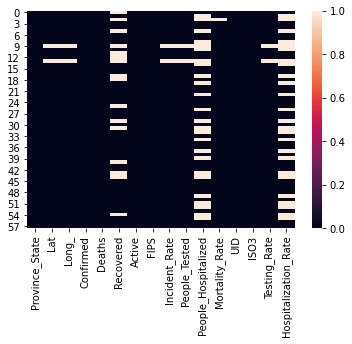

In [35]:
sns.heatmap(df.isnull())#From this we can understand that there are a few columns with missing values missing values in the data set

In [36]:
#Now we will be replacing all the Nan values with the mean as their all the columns consisting of NaN values are numerical

In [37]:
df.fillna(df.mean(),inplace=True)

In [38]:
df

,Province_State,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,32.318200,-86.902300,13052,522,7007.428571,12530.0,1,266.194321,1.644500e+05,1493.000000,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,61.370700,-152.404400,401,10,352.000000,39.0,2,54.815493,3.704500e+04,4897.454545,2.493766,84000002,USA,5063.940017,14.342541
2,American Samoa,-14.271000,-170.132000,0,0,7007.428571,0.0,60,0.000000,1.240000e+02,4897.454545,4.458248,16,ASM,222.857246,14.342541
3,Arizona,33.729800,-111.431200,14906,747,3773.000000,10386.0,4,204.788838,1.654350e+05,1792.000000,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,34.969700,-92.373100,5003,107,3852.000000,1044.0,5,165.782801,9.625800e+04,535.000000,2.138717,84000005,USA,3189.670370,10.693584
5,California,36.116200,-119.681600,85997,3497,7007.428571,82500.0,6,217.646575,1.380120e+06,4897.454545,4.066421,84000006,USA,3492.893832,14.342541
6,Colorado,39.059800,-105.311100,22797,1299,3478.000000,18020.0,8,395.868121,1.318370e+05,3955.000000,5.698118,84000008,USA,2289.339188,17.348774
7,Connecticut,41.597800,-72.755400,39017,3529,6264.000000,29224.0,9,1094.357902,1.907180e+05,10946.000000,9.044775,84000009,USA,5349.302875,28.054438
8,Delaware,39.318500,-75.507100,8194,310,3965.000000,3919.0,10,841.476990,4.541200e+04,4897.454545,3.783256,84000010,USA,4663.552976,14.342541
9,Diamond Princess,36.840089,-85.206614,49,0,7007.428571,49.0,88888,396.230806,2.258534e+05,4897.454545,0.000000,84088888,USA,3894.186870,14.342541


In [41]:
df.isnull().sum()

Province_State          0
Lat                     0
Long_                   0
Confirmed               0
Deaths                  0
Recovered               0
Active                  0
FIPS                    0
Incident_Rate           0
People_Tested           0
People_Hospitalized     0
Mortality_Rate          0
UID                     0
ISO3                    0
Testing_Rate            0
Hospitalization_Rate    0
dtype: int64

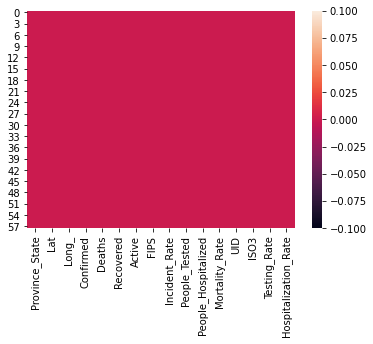

In [42]:
sns.heatmap(df.isnull())

In [ ]:
#From the above analysis we can confirm that all NaN values have been treated

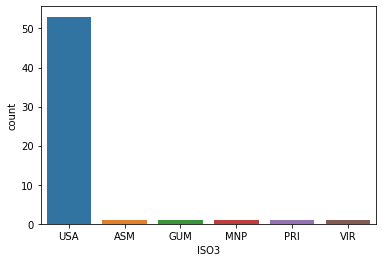

In [43]:
#Now lets visualize the data where patient exist from different geographical sections
sns.countplot(df['ISO3'])

In [44]:
df['ISO3'].value_counts()

USA    53
ASM     1
MNP     1
GUM     1
VIR     1
PRI     1
Name: ISO3, dtype: int64

In [45]:
#Now lets find the correlation between different columns of the dataset
df.corr()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
Lat,1.000000,-0.278274,0.120391,0.119685,0.030196,0.119635,-0.000404,0.245693,0.084769,2.645628e-02,-0.134906,7.727677e-01,0.309579,-6.625465e-02
Long_,-0.278274,1.000000,0.009951,0.028690,-0.041588,0.011604,0.000396,0.041318,-0.077781,7.967739e-02,0.297192,-5.259975e-01,0.190191,7.138145e-02
Confirmed,0.120391,0.009951,1.000000,0.982191,0.822547,0.985218,-0.096696,0.708436,0.824136,8.692673e-01,0.382537,1.539717e-01,0.332464,2.874708e-01
Deaths,0.119685,0.028690,0.982191,1.000000,0.830223,0.954378,-0.075053,0.710105,0.739634,9.082786e-01,0.427127,1.200429e-01,0.344465,2.982254e-01
Recovered,0.030196,-0.041588,0.822547,0.830223,1.000000,0.725085,-0.000012,0.542795,0.711255,7.618294e-01,0.322160,1.303142e-01,0.220597,2.316917e-01
Active,0.119635,0.011604,0.985218,0.954378,0.725085,1.000000,-0.092276,0.700926,0.826144,8.359377e-01,0.367626,1.463538e-01,0.321395,2.845637e-01
FIPS,-0.000404,0.000396,-0.096696,-0.075053,-0.000012,-0.092276,1.000000,-0.000237,-0.000209,9.150251e-06,-0.262178,5.802216e-02,-0.000100,-1.176128e-04
Incident_Rate,0.245693,0.041318,0.708436,0.710105,0.542795,0.700926,-0.000237,1.000000,0.441669,5.510764e-01,0.353882,2.643102e-01,0.620621,1.960289e-01
People_Tested,0.084769,-0.077781,0.824136,0.739634,0.711255,0.826144,-0.000209,0.441669,1.000000,6.420913e-01,0.220200,2.356350e-01,0.230753,2.526802e-01
People_Hospitalized,0.026456,0.079677,0.869267,0.908279,0.761829,0.835938,0.000009,0.551076,0.642091,1.000000e+00,0.334335,6.697668e-09,0.270255,3.775863e-01


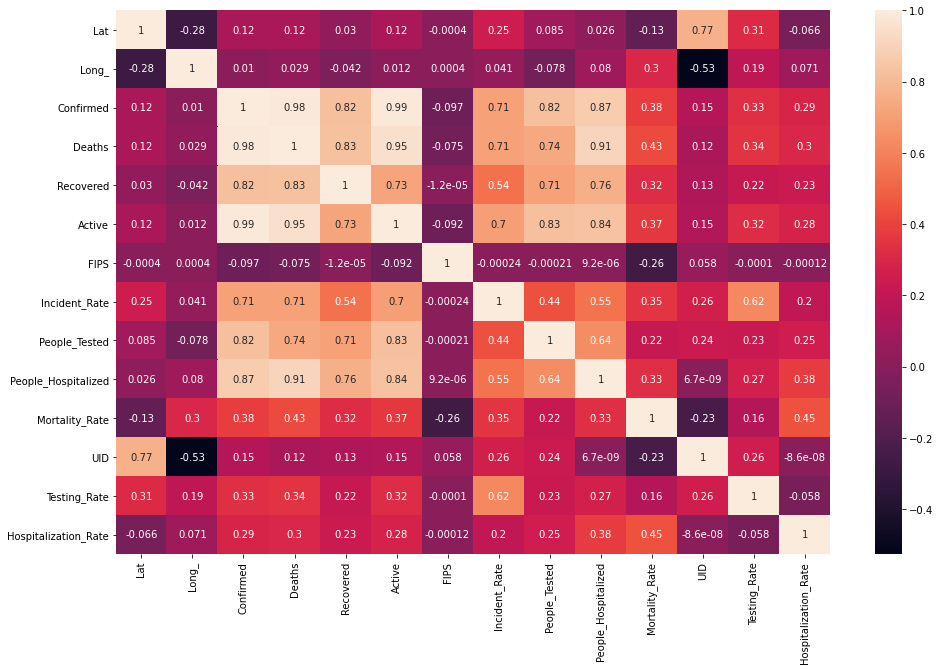

In [46]:
#Now lets plot the correlation using heatmap to understand the correlation using visualization
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True)

In [47]:
#Here we can see that Province_state and ISO3 column correlation is not plotted in the heatmap as it is of type object now lets encode the class type into decimal type to establish the correlation

In [49]:
le=LabelEncoder()
df['Province_State']=le.fit_transform(df['Province_State'])

In [50]:
df['Province_State'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57])

In [51]:
df['ISO3']=le.fit_transform(df['ISO3'])

In [52]:
df['ISO3'].unique()

array([4, 0, 1, 2, 3, 5])

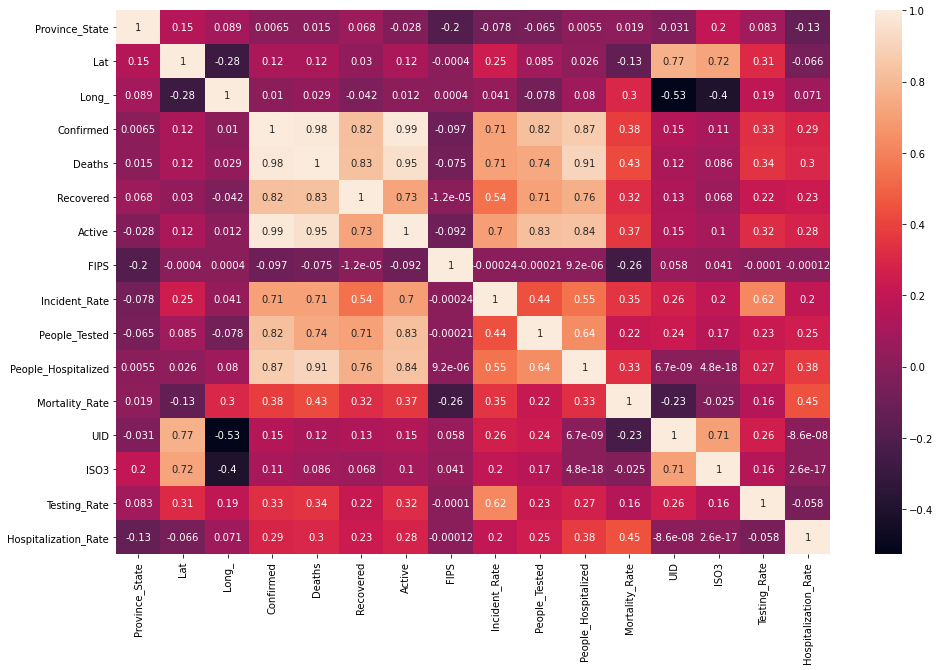

In [53]:
#Now we have converted our categorical column to numerical format now lets again plot and check what happens
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True)

Province_State              AxesSubplot(0.125,0.71587;0.168478x0.16413)
Lat                      AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Long_                    AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Confirmed                AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Deaths                     AxesSubplot(0.125,0.518913;0.168478x0.16413)
Recovered               AxesSubplot(0.327174,0.518913;0.168478x0.16413)
Active                  AxesSubplot(0.529348,0.518913;0.168478x0.16413)
FIPS                    AxesSubplot(0.731522,0.518913;0.168478x0.16413)
Incident_Rate              AxesSubplot(0.125,0.321957;0.168478x0.16413)
People_Tested           AxesSubplot(0.327174,0.321957;0.168478x0.16413)
People_Hospitalized     AxesSubplot(0.529348,0.321957;0.168478x0.16413)
Mortality_Rate          AxesSubplot(0.731522,0.321957;0.168478x0.16413)
UID                           AxesSubplot(0.125,0.125;0.168478x0.16413)
ISO3                       AxesSubplot(0.327174,0.125;0.168478x0

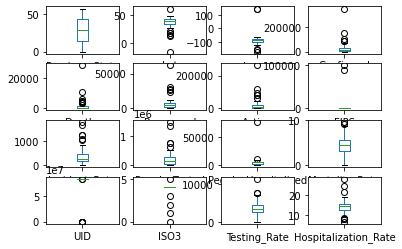

In [54]:
#Now lets check for outliers
df.plot(kind='box',subplots=True,layout=(4,4))

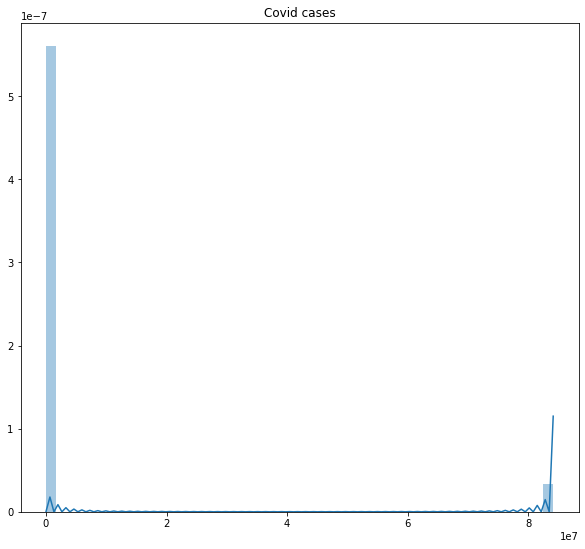

In [55]:
plt.figure(figsize=(10,9))
plt.title("Covid cases")
sns.distplot(df)

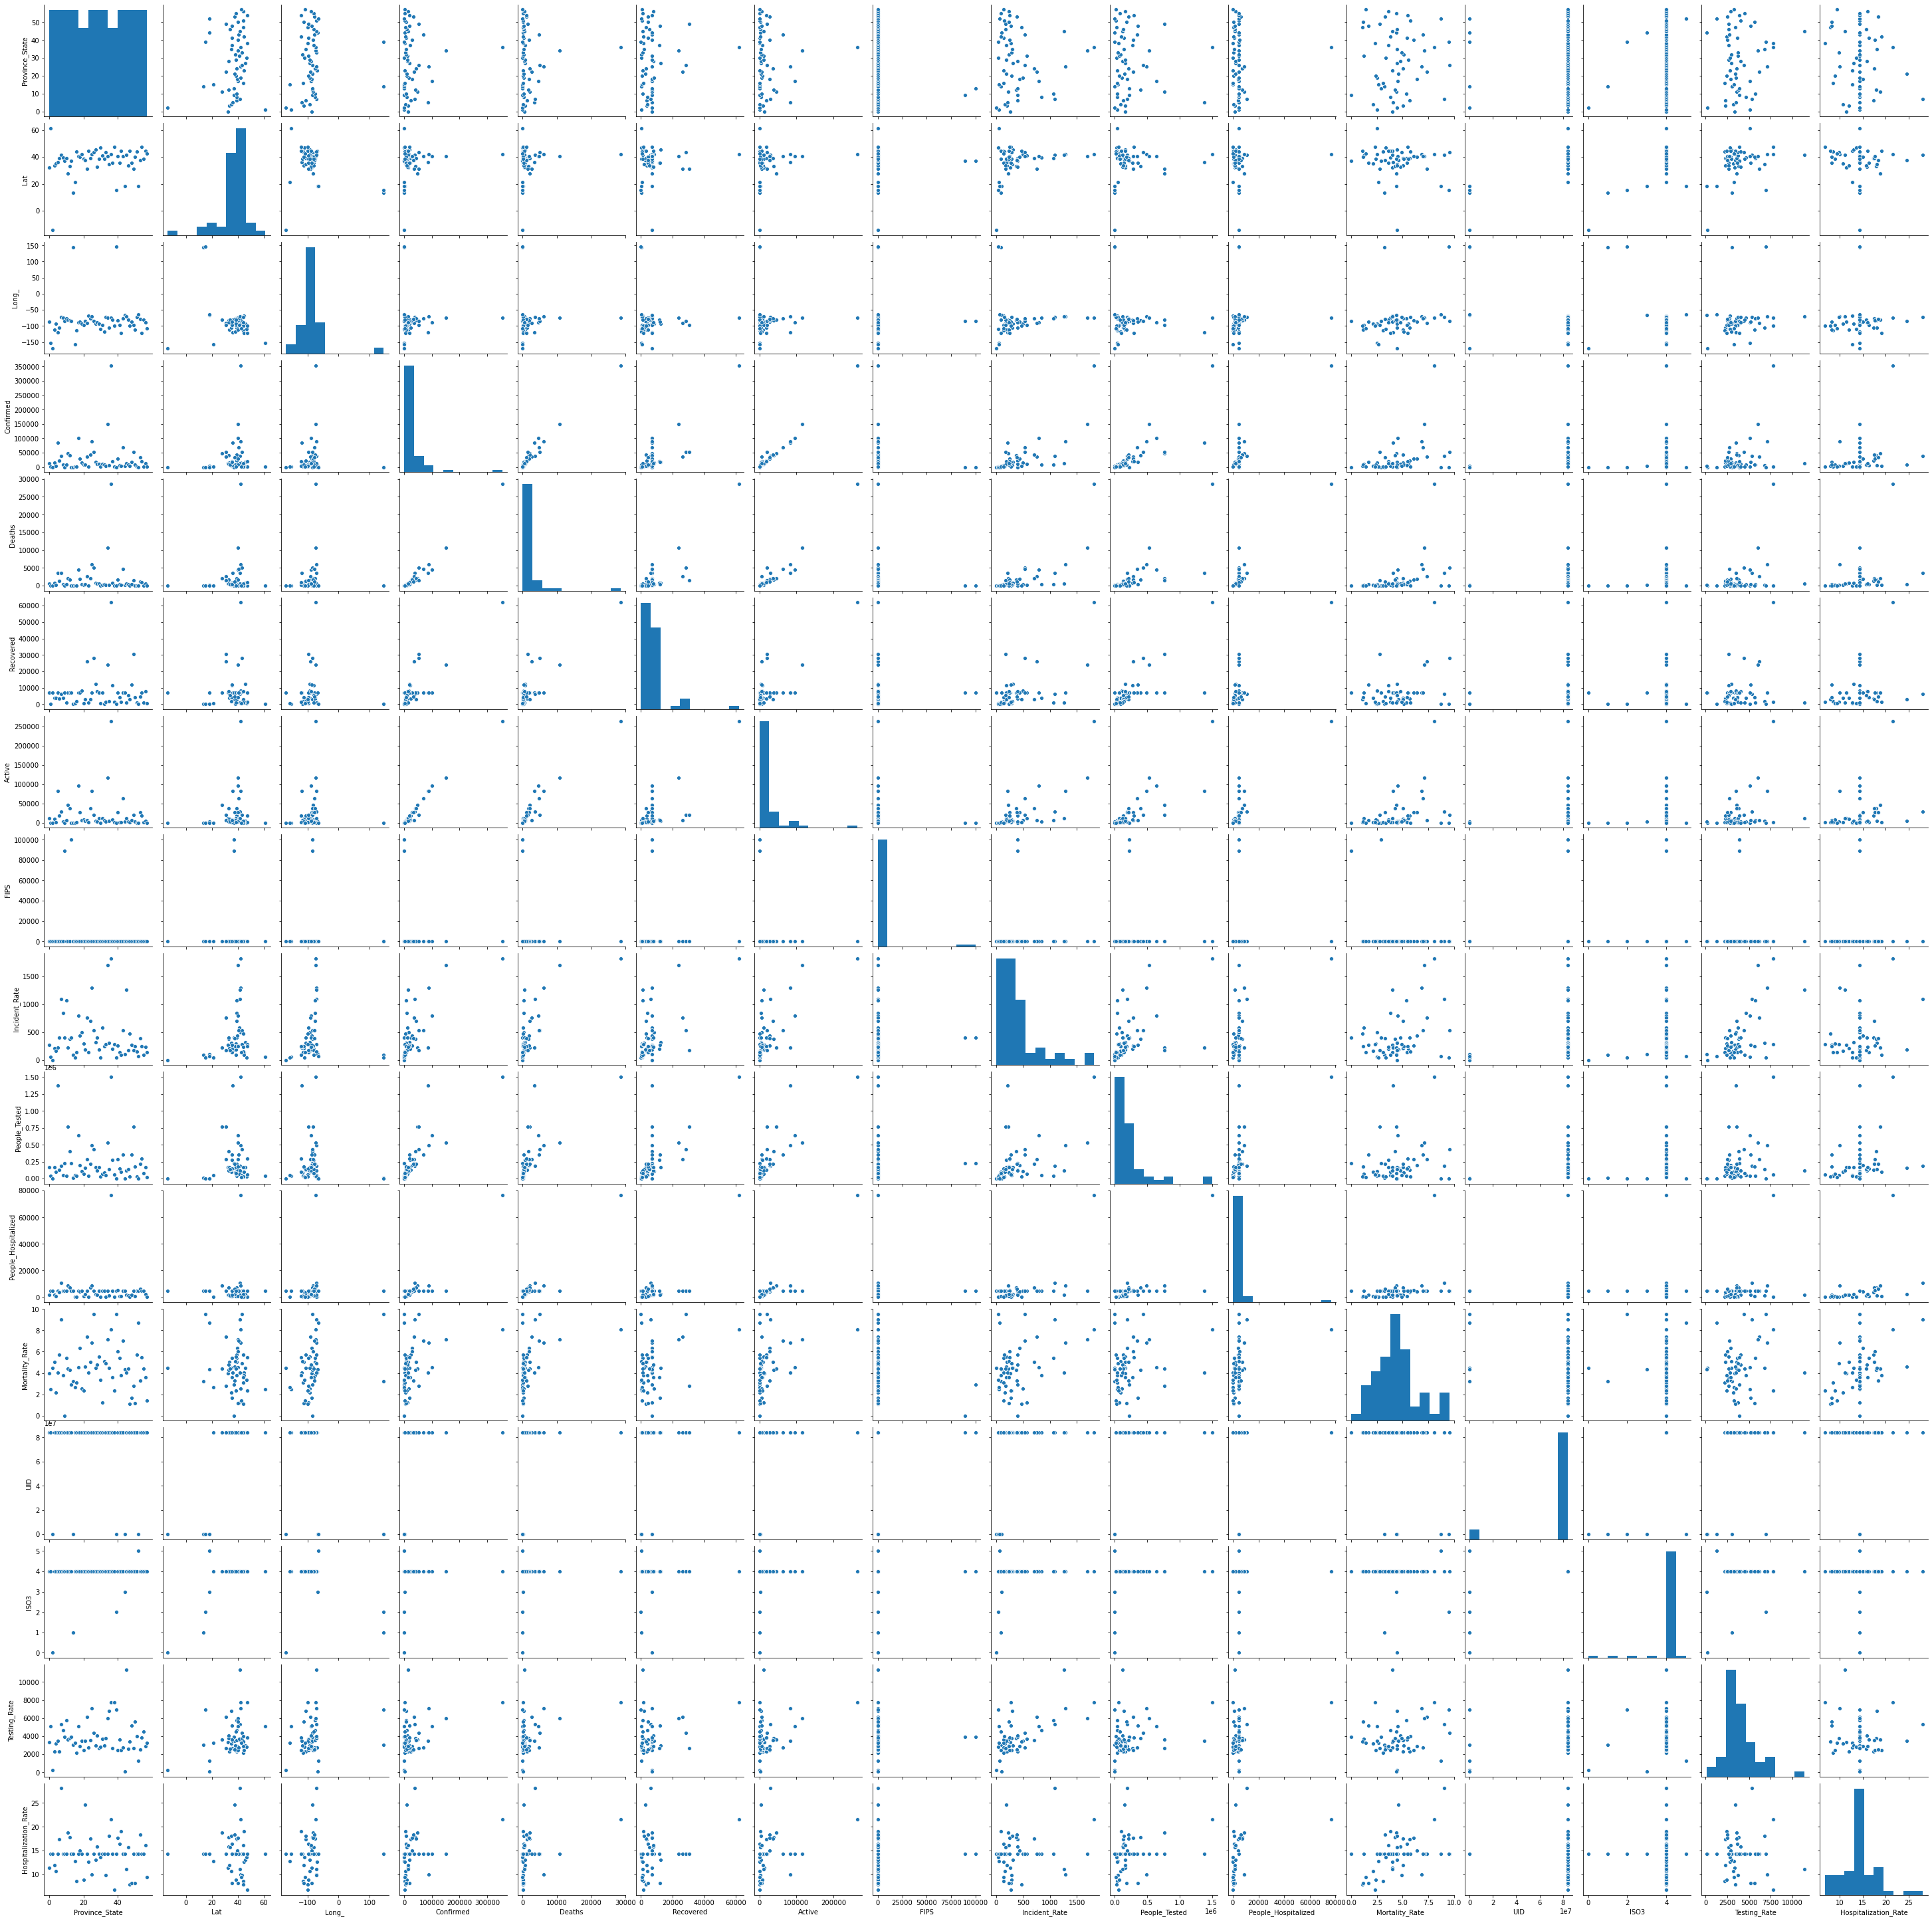

In [56]:
sns.pairplot(df)

In [57]:
#Lets check for skewness in the dataset
df.skew()

Province_State          0.000000
Lat                    -2.250097
Long_                   3.567919
Confirmed               4.708614
Deaths                  5.489201
Recovered               3.647693
Active                  4.180953
FIPS                    5.269070
Incident_Rate           1.988351
People_Tested           2.829700
People_Hospitalized     6.869437
Mortality_Rate          0.496115
UID                    -3.027480
ISO3                   -4.126625
Testing_Rate            1.313407
Hospitalization_Rate    0.867341
dtype: float64

In [58]:
#Now lets remove the skewness in the data
import scipy.stats
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.70244092e+00, 4.26523477e-01, 3.49982309e-02, 2.62999251e-01,
        2.68934023e-01, 0.00000000e+00, 1.84202386e-01, 1.90471516e-01,
        3.31615693e-01, 2.11041917e-01, 3.47604767e-01, 2.18727182e-01,
        3.06995177e-01, 2.17198770e-01, 2.86980973e-01, 7.74497410e-01],
       [1.64270615e+00, 2.31382962e+00, 1.38693367e+00, 5.05788407e-01,
        3.95372994e-01, 6.78047590e-01, 4.89328519e-01, 1.90413571e-01,
        8.70668532e-01, 6.48929571e-01, 0.00000000e+00, 9.36418161e-01,
        3.06995220e-01, 2.17198770e-01, 6.21379592e-01, 4.73806709e-16],
       [1.58297138e+00, 4.82101134e+00, 1.75282379e+00, 5.13484119e-01,
        3.97842505e-01, 0.00000000e+00, 4.90281199e-01, 1.87052738e-01,
        1.01045759e+00, 7.75826083e-01, 0.00000000e+00, 4.23371775e-16,
        3.25578286e+00, 5.38170286e+00, 1.95023139e+00, 4.73806709e-16],
       [1.52323661e+00, 2.93375472e-01, 5.41264279e-01, 2.27418578e-01,
        2.13370022e-01, 3.29519951e-01, 2.36575329e-01, 1.902

In [59]:
threshold=3
print(np.where(z>3))

(array([ 2,  2,  2,  5,  7,  9, 13, 14, 14, 14, 34, 36, 36, 36, 36, 36, 36,
       36, 39, 39, 44, 45, 52], dtype=int64), array([ 1, 12, 13,  9, 15,  7,  7,  2, 12, 13,  8,  3,  4,  5,  6,  8,  9,
       10,  2, 12, 12, 14, 12], dtype=int64))


In [60]:
#Now lets remove the skewmess
df_new=df[(z<3).all(axis=1)]
df_new

,Province_State,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,0,32.3182,-86.9023,13052,522,7007.428571,12530.0,1,266.194321,164450.0,1493.000000,3.999387,84000001,4,3353.942386,11.438860
1,1,61.3707,-152.4044,401,10,352.000000,39.0,2,54.815493,37045.0,4897.454545,2.493766,84000002,4,5063.940017,14.342541
3,3,33.7298,-111.4312,14906,747,3773.000000,10386.0,4,204.788838,165435.0,1792.000000,5.011405,84000004,4,2272.859351,12.022005
4,4,34.9697,-92.3731,5003,107,3852.000000,1044.0,5,165.782801,96258.0,535.000000,2.138717,84000005,4,3189.670370,10.693584
6,6,39.0598,-105.3111,22797,1299,3478.000000,18020.0,8,395.868121,131837.0,3955.000000,5.698118,84000008,4,2289.339188,17.348774
8,8,39.3185,-75.5071,8194,310,3965.000000,3919.0,10,841.476990,45412.0,4897.454545,3.783256,84000010,4,4663.552976,14.342541
10,10,38.8974,-77.0268,7551,407,1059.000000,6085.0,11,1069.927127,40419.0,4897.454545,5.390015,84000011,4,5727.106946,14.342541
11,11,27.7663,-81.6868,47471,2096,7007.428571,45375.0,12,221.024217,771348.0,8934.000000,4.415327,84000012,4,3591.383953,18.819911
12,12,33.0406,-83.6431,39801,1697,7007.428571,38104.0,13,374.864974,402940.0,7107.000000,4.263712,84000013,4,3795.082856,17.856335
15,15,21.0943,-157.4983,643,17,578.000000,48.0,15,45.413710,46304.0,82.000000,2.643857,84000015,4,3270.352122,12.752722


In [61]:
df.shape

(58, 16)

In [62]:
df_new.shape

(46, 16)

In [63]:
y1=df_new.iloc[:,12:13]#setting output for new data after removing outliers
y2=df.iloc[:,12:13]#setting output for original data
#we would be analyzing both the data ie after outlier removal and before removal
x1=df_new.drop(['Mortality_Rate'],axis=1)
x2=df.drop(['Mortality_Rate'],axis=1)

In [64]:
x1.shape

(46, 15)

In [65]:
y1.shape

(46, 1)

In [66]:
x2.shape

(58, 15)

In [67]:
y2.shape

(58, 1)

In [68]:
scale=StandardScaler()
x1=scale.fit_transform(x1)

In [69]:
x2=scale.fit_transform(x2)

In [70]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.33,random_state=42)

In [71]:
x_train.shape

(30, 15)

In [72]:
y_train.shape

(30, 1)

In [73]:
x_test.shape

(16, 15)

In [74]:
y_test.shape

(16, 1)

In [75]:
from sklearn.metrics import r2_score

In [83]:
model=[LinearRegression(),DecisionTreeRegressor(),SVR(),KNeighborsRegressor(),RandomForestRegressor()]
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('\n************For model',m,'******************')
    print('Predicted rate is:',predm,'for model',m)
    print('\nActual rate is:',(y_test),'for model',m)
    print("\nError")
    print("\nMean absolute error is",mean_absolute_error(y_test,predm),'for model',m)
    print("\nMean Squared error is",mean_squared_error(y_test,predm),'for model',m)
    print("\nSquared root of mean squared error is",np.sqrt(mean_squared_error(y_test,predm)),'for model',m)
    print("\nR2 Score is",r2_score(y_test,predm),'for model',m)


************For model LinearRegression() ******************
Predicted rate is: [[84000049.]
 [84000031.]
 [84000032.]
 [84000055.]
 [84000045.]
 [84000051.]
 [84000008.]
 [84000018.]
 [84000013.]
 [84000005.]
 [84000011.]
 [84000030.]
 [84000040.]
 [84000025.]
 [84000023.]
 [84000019.]] for model LinearRegression()

Actual rate is:          UID
50  84000049
31  84000031
32  84000032
56  84000055
46  84000045
53  84000051
6   84000008
18  84000018
12  84000013
4   84000005
10  84000011
30  84000030
41  84000040
25  84000025
23  84000023
19  84000019 for model LinearRegression()

Error

Mean absolute error is 0.0 for model LinearRegression()

Mean Squared error is 0.0 for model LinearRegression()

Squared root of mean squared error is 0.0 for model LinearRegression()

R2 Score is 1.0 for model LinearRegression()

************For model DecisionTreeRegressor() ******************
Predicted rate is: [84000047.         84000025.66666667 84000035.         84000054.
 84000047.         84000047

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
<ipython-input-83-b5b81993989d>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  m.fit(x_train,y_train)



************For model RandomForestRegressor() ******************
Predicted rate is: [84000049.08008333 84000030.18288094 84000033.18945238 84000051.91353571
 84000047.34970239 84000049.63936906 84000008.3955     84000017.27966668
 84000013.00000003 84000003.39466667 84000011.3221667  84000028.0161508
 84000039.68985717 84000025.23333333 84000021.37165082 84000019.14383334] for model RandomForestRegressor()

Actual rate is:          UID
50  84000049
31  84000031
32  84000032
56  84000055
46  84000045
53  84000051
6   84000008
18  84000018
12  84000013
4   84000005
10  84000011
30  84000030
41  84000040
25  84000025
23  84000023
19  84000019 for model RandomForestRegressor()

Error

Mean absolute error is 1.0141433533281088 for model RandomForestRegressor()

Mean Squared error is 1.818891257032007 for model RandomForestRegressor()

Squared root of mean squared error is 1.3486627662362474 for model RandomForestRegressor()

R2 Score is 0.9923734966538336 for model RandomForestRegressor()


In [85]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
pred=lr.predict(x_test)
print('\nPredicted rate is:',pred)
print('\nActual rate is:',(y_test))
print("\nError")
print("\nMean absolute error is",mean_absolute_error(y_test,pred))
print("\nMean Squared error is",mean_squared_error(y_test,pred))
print("\nSquared root of mean squared error is",np.sqrt(mean_squared_error(y_test,pred)))
print("\nR2 Score is",r2_score(y_test,pred))


Predicted rate is: [[84000049.]
 [84000031.]
 [84000032.]
 [84000055.]
 [84000045.]
 [84000051.]
 [84000008.]
 [84000018.]
 [84000013.]
 [84000005.]
 [84000011.]
 [84000030.]
 [84000040.]
 [84000025.]
 [84000023.]
 [84000019.]]

Actual rate is:          UID
50  84000049
31  84000031
32  84000032
56  84000055
46  84000045
53  84000051
6   84000008
18  84000018
12  84000013
4   84000005
10  84000011
30  84000030
41  84000040
25  84000025
23  84000023
19  84000019

Error

Mean absolute error is 0.0

Mean Squared error is 0.0

Squared root of mean squared error is 0.0

R2 Score is 1.0


In [85]:
#From The above model scores we come to the conclusion that Linear Regression has the highest R2score now we would save our best model

In [86]:
filename='picklecovid19usrf.pkl'
pickle.dump(lr,open(filename,'wb'))

In [ ]:
#Now we have saved the pickle file of our best model going further we would load the model and then predict mortality rate as an when needed